In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = 'POPvsProfit.txt'

In [4]:
data = pd.read_csv(path,header=None,names=['population','profit'])
data

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


<AxesSubplot: xlabel='population', ylabel='profit'>

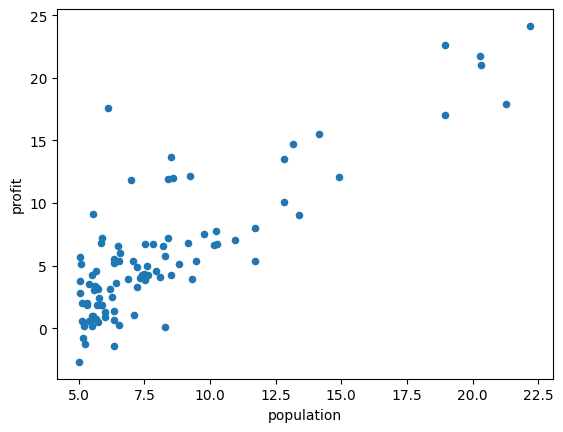

In [6]:
data.plot(kind='scatter', x='population', y='profit')

In [7]:
data.insert(0, 'ones', 1)
data

,ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [8]:
col = data.shape[1]
x = data.iloc[:,0:col-1]
y = data.iloc[:,col-1:col]

In [10]:
theta = np.matrix(np.zeros(col - 1))
theta

matrix([[0., 0.]])

In [11]:
X = np.matrix(x.values)
Y = np.matrix(y.values)

In [12]:
def computeCost(x,y,theta):
    z = np.power(x * theta.T - y, 2)
    return np.sum(z) / (2 * len(x))


In [13]:
computeCost(X,Y,theta)

32.072733877455676

In [14]:
alpha = 0.002
iters = 10000

In [15]:
def gradientDescent(x,y,theta,alpha,iters):
    tempTheta = np.matrix(np.zeros(theta.shape))
    numClms = theta.shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T - y)
        for j in range(numClms):
            mult = np.multiply(error , x[:,j])
            tempTheta[0,j] = theta[0,j] - (np.sum(mult) * alpha / len(x))
        theta = tempTheta
        cost[i] = computeCost(x,y,theta)

    return theta, cost    


In [16]:
gradientTheta , cost = gradientDescent(X,Y,theta,alpha,iters)
print(gradientTheta)

[[-3.78778781  1.18218457]]


In [17]:
Y_predicted = gradientTheta[0,0] + gradientTheta[0,1] * X
Y_predicted

matrix([[-2.60560324,  3.43547813],
        [-2.60560324,  2.74697383],
        [-2.60560324,  6.28276966],
        [-2.60560324,  4.49128717],
        [-2.60560324,  3.13957733],
        [-2.60560324,  6.12234721],
        [-2.60560324,  5.0506969 ],
        [-2.60560324,  6.35310964],
        [-2.60560324,  3.88009774],
        [-2.60560324,  2.18768231],
        [-2.60560324,  2.96331361],
        [-2.60560324, 12.95667443],
        [-2.60560324,  2.99085851],
        [-2.60560324,  6.15249292],
        [-2.60560324,  2.88056069],
        [-2.60560324,  2.57165586],
        [-2.60560324,  3.73728985],
        [-2.60560324,  2.27693725],
        [-2.60560324,  3.8131861 ],
        [-2.60560324,  4.57120284],
        [-2.60560324,  3.52887071],
        [-2.60560324, 20.1750934 ],
        [-2.60560324,  2.70252369],
        [-2.60560324,  3.69082999],
        [-2.60560324,  2.7909511 ],
        [-2.60560324, 18.60869885],
        [-2.60560324, 11.37727584],
        [-2.60560324,  9.165

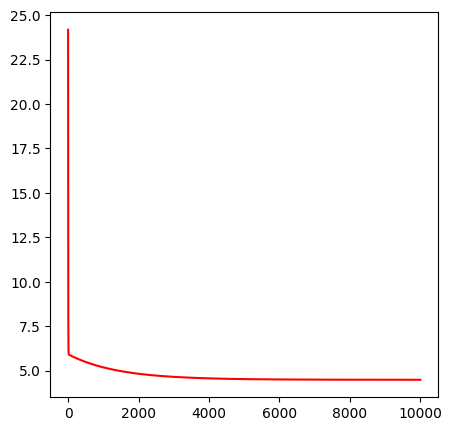

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r')

<h4>
As you can see, the cost will change very sightly whan we increase the iteration over than 10000
<h4>

<h3>
Now lets plot Scatter Y and the staight line of Y_predicted togither
<h3>

Text(0.5, 1.0, 'population vs profit')

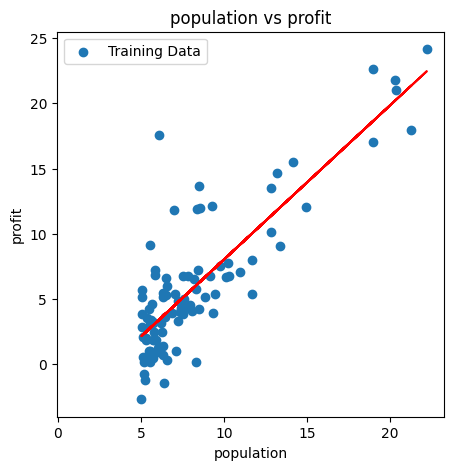

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X,Y_predicted,'r')
ax.scatter(data.population,data.profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('population vs profit')
